# Tutorial 3 (b)
# The Linear Regression using Time Series

## Importing the data and plotting it

In [1]:
# Load the libraries
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [2]:
# Load the data set for Co2 gas
data = sm.datasets.co2.load_pandas()

# Store data into dataframe (df_co2)
df_co2 = data.data

# Display first 5 records
df_co2.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [3]:
# Display number of rows and columns
df_co2.shape

(2284, 1)

In [4]:
# Check the presence of Null values
df_co2.isnull().sum()

co2    59
dtype: int64

In [5]:
# Drop NA values if present
df_co2 = df_co2.dropna()

# Check the presence of Null values
df_co2.isnull().sum()

co2    0
dtype: int64

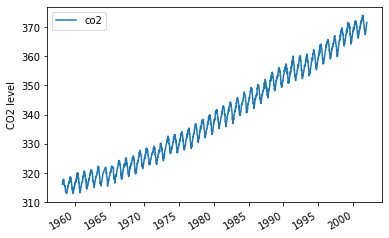

In [6]:
# plot the dataset
ax = df_co2.plot()
ax.set_ylabel('CO2 level')
plt.show()

## Creating the variable month

In [7]:
# Add a new column into df_co2 called as 'month'
df_co2['month'] = [x.month for x in df_co2.index] 

# Display first five records
df_co2.head()

,co2,month
1958-03-29,316.1,3
1958-04-05,317.3,4
1958-04-12,317.6,4
1958-04-19,317.5,4
1958-04-26,316.4,4


## Creating the variable year

In [8]:
# Add a new column into df_co2 called as 'year'
df_co2['year'] = [x.year for x in df_co2.index]

# Display first five records
df_co2.head()

,co2,month,year
1958-03-29,316.1,3,1958
1958-04-05,317.3,4,1958
1958-04-12,317.6,4,1958
1958-04-19,317.5,4,1958
1958-04-26,316.4,4,1958


## Fitting a Linear Regression with two variables

0.9690528910892227 0.34332512339526633


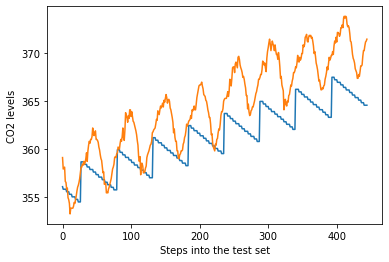

In [9]:
# Import the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create X and y objects
X = df_co2[['year', 'month']]
y = df_co2['co2']

# Create Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 12345, shuffle = False)

# Fit model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

# Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

# Display the training and test score
print(train_r2, test_r2)

# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
plt.xlabel('Steps into the test set')
plt.ylabel('CO2 levels')
plt.show()

## Adding lagged variables into the data

In [10]:
df_co2['co2_l1'] = df_co2['co2'].shift(1)
df_co2['co2_l2'] = df_co2['co2'].shift(2)
df_co2['co2_l3'] = df_co2['co2'].shift(3)
df_co2['co2_l4'] = df_co2['co2'].shift(4)
df_co2['co2_l5'] = df_co2['co2'].shift(5)

# Display the first 10 records
df_co2.head(10)

,co2,month,year,co2_l1,co2_l2,co2_l3,co2_l4,co2_l5
1958-03-29,316.1,3,1958,NaN,NaN,NaN,NaN,NaN
1958-04-05,317.3,4,1958,316.1,NaN,NaN,NaN,NaN
1958-04-12,317.6,4,1958,317.3,316.1,NaN,NaN,NaN
1958-04-19,317.5,4,1958,317.6,317.3,316.1,NaN,NaN
1958-04-26,316.4,4,1958,317.5,317.6,317.3,316.1,NaN
1958-05-03,316.9,5,1958,316.4,317.5,317.6,317.3,316.1
1958-05-17,317.5,5,1958,316.9,316.4,317.5,317.6,317.3
1958-05-24,317.9,5,1958,317.5,316.9,316.4,317.5,317.6
1958-07-05,315.8,7,1958,317.9,317.5,316.9,316.4,317.5
1958-07-12,315.8,7,1958,315.8,317.9,317.5,316.9,316.4


## Drop missing values

In [11]:
# Drop Null values from the dataframe
df_co2 = df_co2.dropna()

# Display the first 10 records
df_co2.head(10)

,co2,month,year,co2_l1,co2_l2,co2_l3,co2_l4,co2_l5
1958-05-03,316.9,5,1958,316.4,317.5,317.6,317.3,316.1
1958-05-17,317.5,5,1958,316.9,316.4,317.5,317.6,317.3
1958-05-24,317.9,5,1958,317.5,316.9,316.4,317.5,317.6
1958-07-05,315.8,7,1958,317.9,317.5,316.9,316.4,317.5
1958-07-12,315.8,7,1958,315.8,317.9,317.5,316.9,316.4
1958-07-19,315.4,7,1958,315.8,315.8,317.9,317.5,316.9
1958-07-26,315.5,7,1958,315.4,315.8,315.8,317.9,317.5
1958-08-02,315.6,8,1958,315.5,315.4,315.8,315.8,317.9
1958-08-09,315.1,8,1958,315.6,315.5,315.4,315.8,315.8
1958-08-16,315.0,8,1958,315.1,315.6,315.5,315.4,315.8


## Fitting the full Linear Regression model

0.998797756425323 0.99043701204628


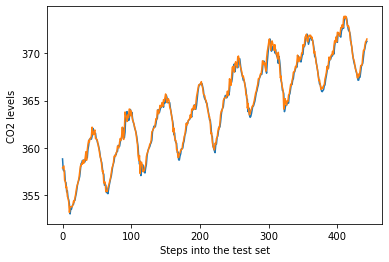

In [12]:
# Create X and y objects
X = df_co2[['year', 'month', 'co2_l1', 'co2_l2', 'co2_l3', 'co2_l4', 'co2_l5']]
y = df_co2['co2']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 12345, shuffle = False)

# Fit the model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

# Calculate the train Forecasting
train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

# Calculate teh r2 score for train and test
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

# Display the results for train and test
print(train_r2, test_r2)

# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
plt.xlabel('Steps into the test set')
plt.ylabel('CO2 levels')
plt.show()